In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [6]:
df = pd.read_csv(r"C:\Users\Hitesh Karthik\OneDrive\Desktop\data science projects\Pakistan Employment 2023\GenderBasedEmploymentInPakistan2023.csv")
df.head()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000,70000,59000
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000,17000,12000
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600,49600,3100
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800,10600,300
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700,47400,2300


In [7]:
df.shape

(4730, 8)

In [8]:
df.dtypes

Province     object
Division     object
District     object
Indicator    object
Area Type    object
Total        object
Male         object
Female       object
dtype: object

In [9]:
#Converting into numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

In [10]:
df['Male'] = pd.to_numeric(df['Male'], errors='coerce')

In [11]:
df['Female'] = pd.to_numeric(df['Female'], errors='coerce')

In [12]:
df.isnull().sum()

Province       0
Division       0
District       0
Indicator      0
Area Type      0
Total        323
Male         343
Female       745
dtype: int64

In [13]:
#removing nulls
df['Total'] = df['Total'].fillna(0)

In [14]:
df['Male'] = df['Male'].fillna(0)

In [15]:
df['Female'] = df['Female'].fillna(0)

In [16]:
#basic stats
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Total,Male,Female
count,4730.00,4730.00,4730.00
mean,110701.46,64160.29,46559.44
std,411366.90,224910.51,193518.75
min,0.00,0.00,0.00
25%,19.00,16.90,6.00
50%,43.80,54.20,33.60
75%,2375.00,2050.00,100.00
max,11119985.00,5813987.00,5303982.00


In [17]:
#checking outliers
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]

In [20]:
outliers

,Province,Division,District,Indicator,Area Type,Total,Male,Female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000.00,70000.00,59000.00
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000.00,17000.00,12000.00
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600.00,49600.00,3100.00
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800.00,10600.00,300.00
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700.00,47400.00,2300.00
...,...,...,...,...,...,...,...,...
4725,Sindh,Hyderabad Division,Matiri,Total Population,Urban,182669.00,94445.00,88207.00
4726,Sindh,Banbhore Division,Thattah,Total Population,Rural,654818.00,340701.00,314105.00
4727,Sindh,Banbhore Division,Thattah,Total Population,Urban,176476.00,90900.00,85556.00
4728,Balochistan,Quetta Division,Lorali,Total Population,Rural,332532.00,176186.00,156332.00


In [21]:
population_distribution = df.groupby(['Province', 'Division', 'District'])['Total'].sum().reset_index()

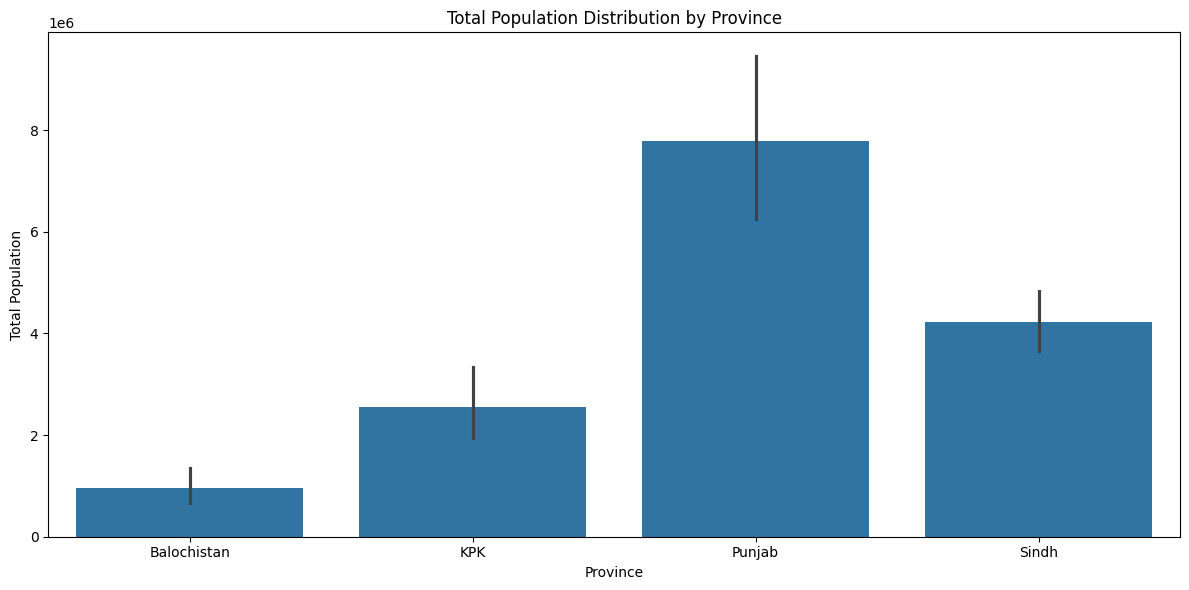

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Province', y='Total', data=population_distribution)
plt.title('Total Population Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Total Population')
plt.tight_layout()

Observation:
Punjab is most populated provice

In [23]:
df['Indicator'].unique()

array(['Working Age Population', 'Labour Force', 'Employed', 'Unemployed',
       'Refined Participation Rate (%)', 'Unemployment Rate (%)',
       'Employment to Population Ratio (%)', 'Agriculture Employee (%)',
       'Industry Employee (%)', 'Services Employee (%)',
       'Formal Activity (%)', 'Informal Activity (%)', 'Employers (%)',
       'Own Account Workers (%)', 'Contributing Family  Workers (%)',
       'Employees (%)', 'Literacy Rate (%)', 'Underemployment Rate (%)',
       'Mean Hours Work/Per Week', 'Total Population'], dtype=object)

In [24]:
selected_indicator = ['Unemployment Rate (%)']
unemployed_data = df[df['Indicator'].isin(selected_indicator)]

In [25]:
unemployed_data_variation = unemployed_data.groupby(['Province', 'Division'])['Total'].mean().reset_index()

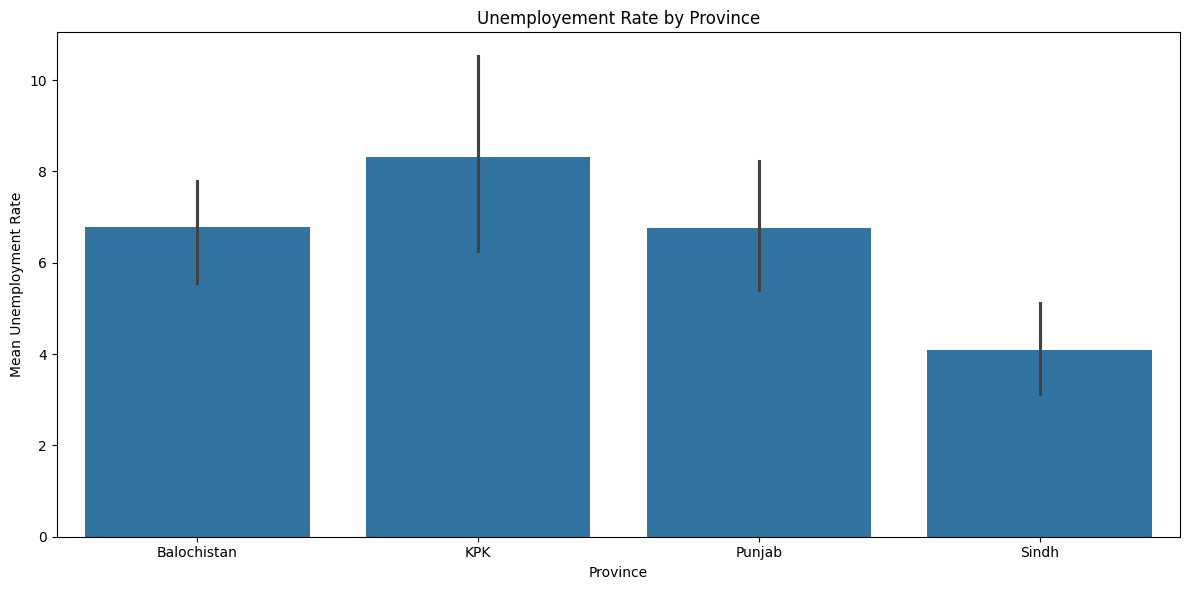

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='Province', y='Total', data=unemployed_data_variation)
plt.title('Unemployement Rate by Province')
plt.xlabel('Province')
plt.ylabel('Mean Unemployment Rate')
plt.tight_layout()

Observation:
Highest Unemployment Rate is in KPK

In [27]:
selected_indicator = ['Literacy Rate (%)', 'Employment to Population Ratio (%)']
literacy_rate_data = df[df['Indicator'].isin(selected_indicator)]

In [28]:
literacy_data_variation = literacy_rate_data.groupby(['Province'])['Total'].mean().reset_index()

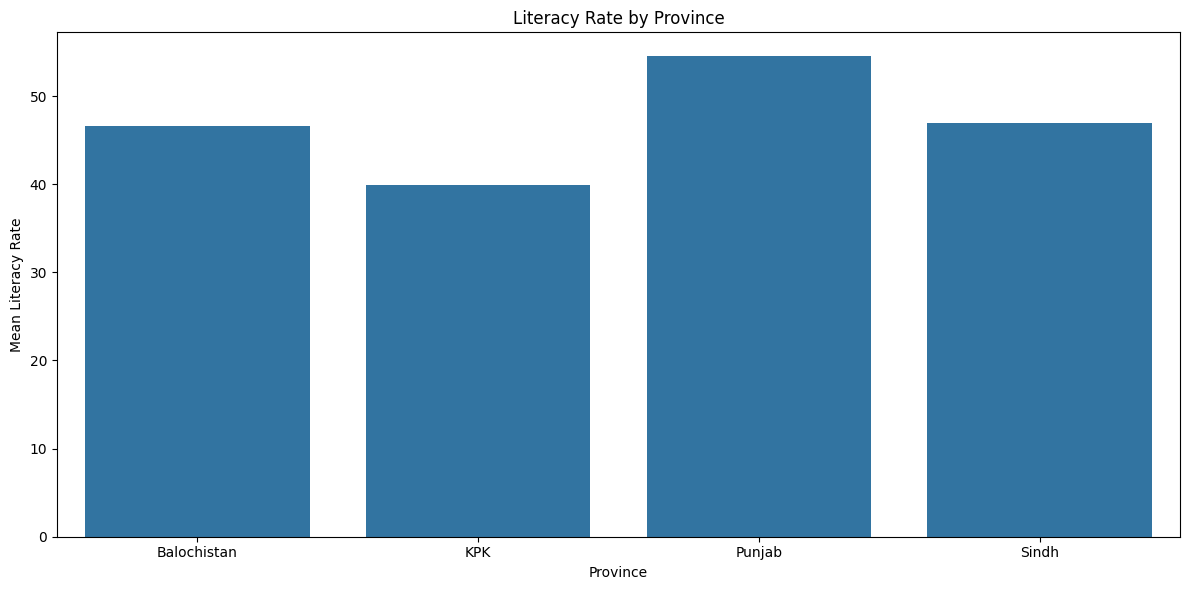

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='Province', y='Total', data=literacy_data_variation)
plt.title('Literacy Rate by Province')
plt.xlabel('Province')
plt.ylabel('Mean Literacy Rate')
plt.tight_layout()

Observation:
Highest Literacy Rate is of Punjab

In [30]:
literacy_data_variation = literacy_rate_data.groupby(['District', 'Area Type'])['Total'].mean().reset_index()

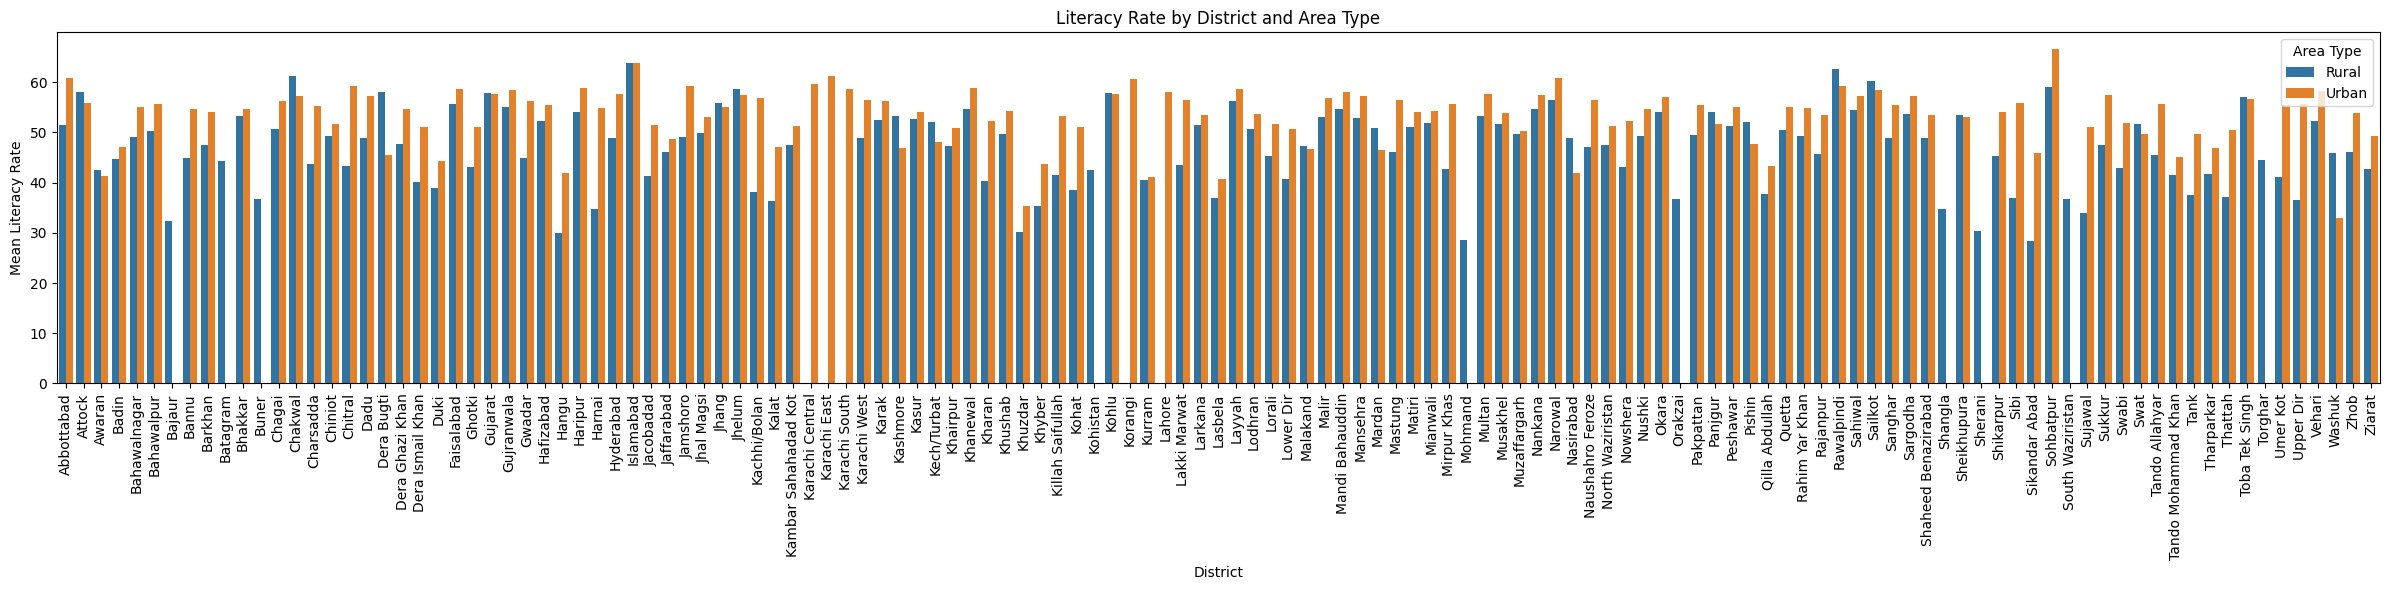

In [31]:
plt.figure(figsize=(24,6))
sns.barplot(x='District', y='Total', hue='Area Type', data=literacy_data_variation)
plt.title('Literacy Rate by District and Area Type')
plt.xlabel('District')
plt.ylabel('Mean Literacy Rate')
plt.xticks(rotation=90)
plt.tight_layout()

It can be seen that literacy rate of Urban areas are higher than rural areas 

In [32]:
aggregated_data = literacy_rate_data.groupby(['District', 'Indicator'])['Total'].mean().reset_index()

In [33]:
pivoted_data = aggregated_data.pivot(index='District', columns='Indicator', values='Total')

In [34]:
pivoted_data['Literacy Rate (%)'] = pd.to_numeric(pivoted_data['Literacy Rate (%)'], errors='coerce')
pivoted_data['Employment to Population Ratio (%)'] = pd.to_numeric(pivoted_data['Employment to Population Ratio (%)'], errors='coerce')

In [35]:
correlation = pivoted_data['Literacy Rate (%)'].corr(pivoted_data['Employment to Population Ratio (%)'])

In [36]:
correlation

0.379665784660908

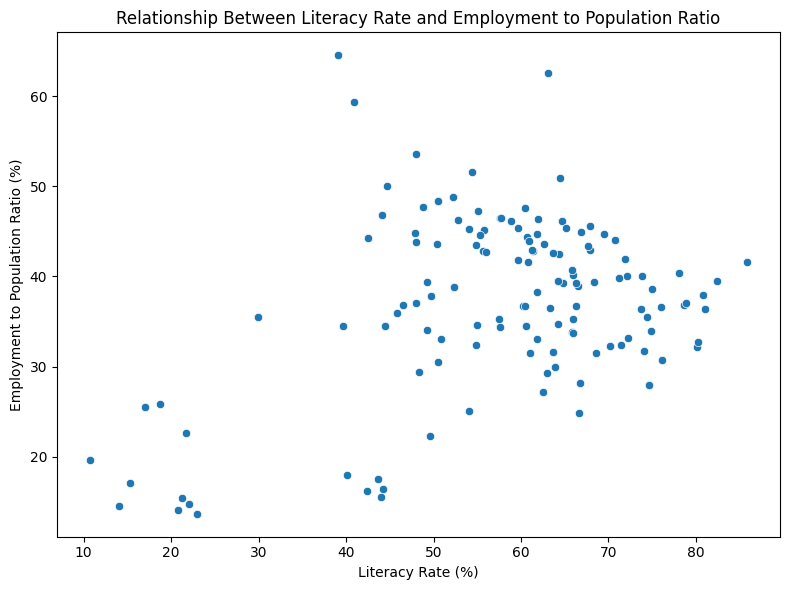

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Literacy Rate (%)', y='Employment to Population Ratio (%)', data=pivoted_data)
plt.title('Relationship Between Literacy Rate and Employment to Population Ratio')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Employment to Population Ratio (%)')
plt.tight_layout()

Observation:
Literacy Rate and Employment to Population Ratio are positively correlated

In [38]:
selected_indicator = ['Employed', 'Employment to Population Ratio (%)']
employed_data = df[df['Indicator'].isin(selected_indicator)]

In [39]:
male_employed_data = employed_data.groupby(['Province'])['Male'].mean().reset_index()

In [40]:
female_employed_data = employed_data.groupby(['Province'])['Female'].mean().reset_index()

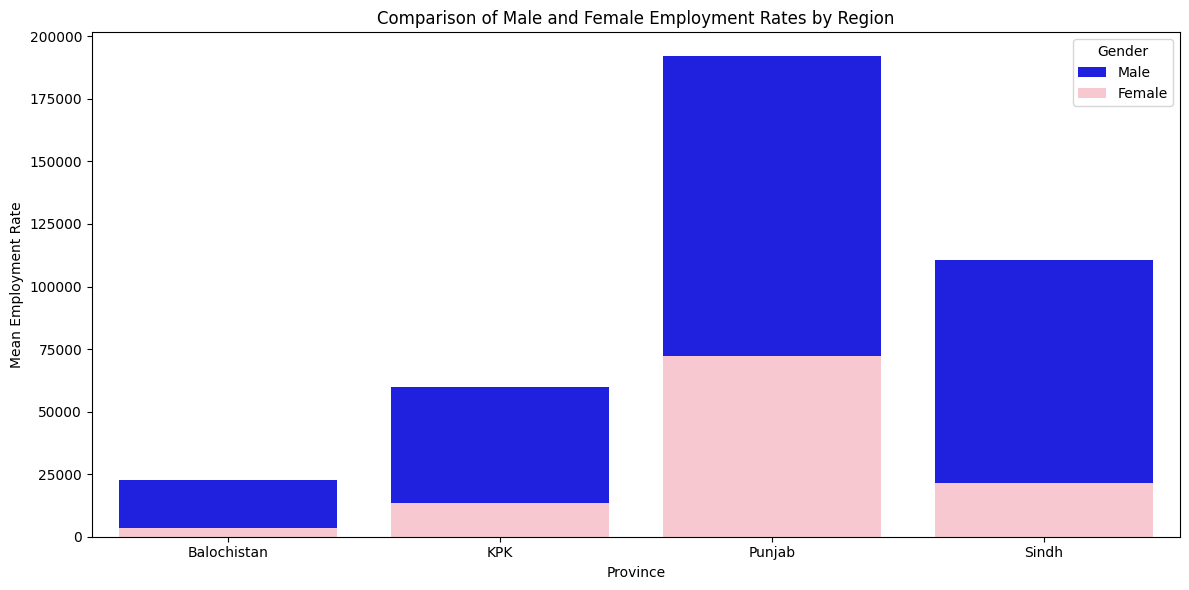

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x='Province', y='Male', data=male_employed_data, color='blue', label='Male')
sns.barplot(x='Province', y='Female', data=female_employed_data, color='pink', label='Female')
plt.title('Comparison of Male and Female Employment Rates by Region')
plt.xlabel('Province')
plt.ylabel('Mean Employment Rate')
plt.legend(title='Gender', loc='best')
plt.tight_layout()

In [42]:
population_division_max = df.groupby(['Division'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False).head(5)

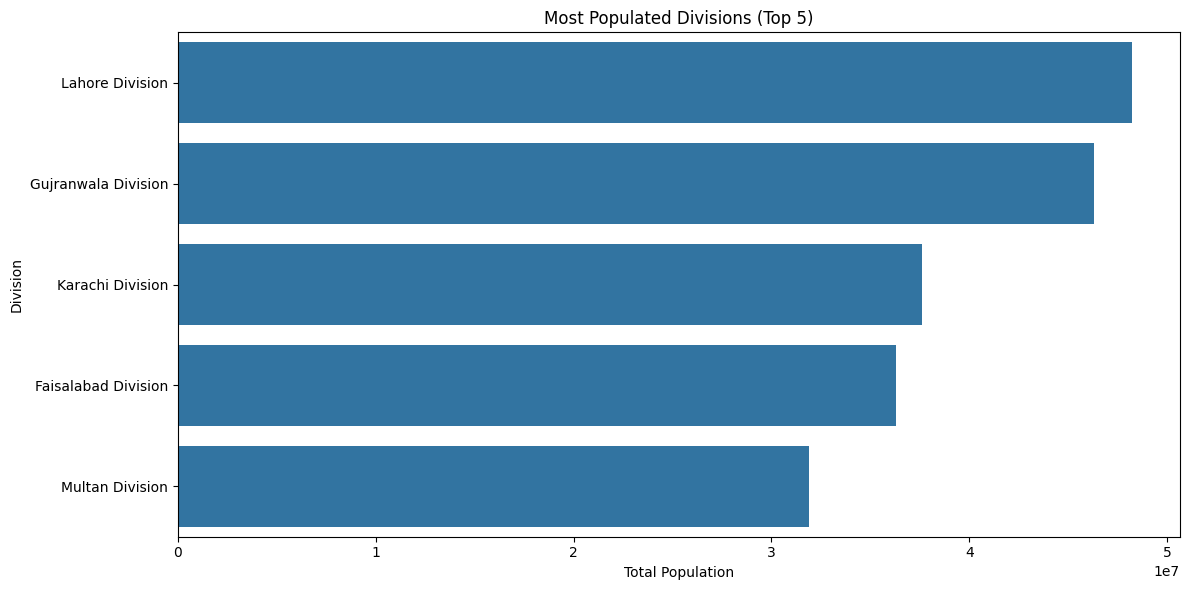

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='Total', y='Division', data=population_division_max)
plt.title('Most Populated Divisions (Top 5)')
plt.xlabel('Total Population')
plt.ylabel('Division')
plt.tight_layout()

In [44]:
population_division_min = df.groupby(['Division'])['Total'].sum().reset_index().sort_values(by='Total', ascending=True).head(5)

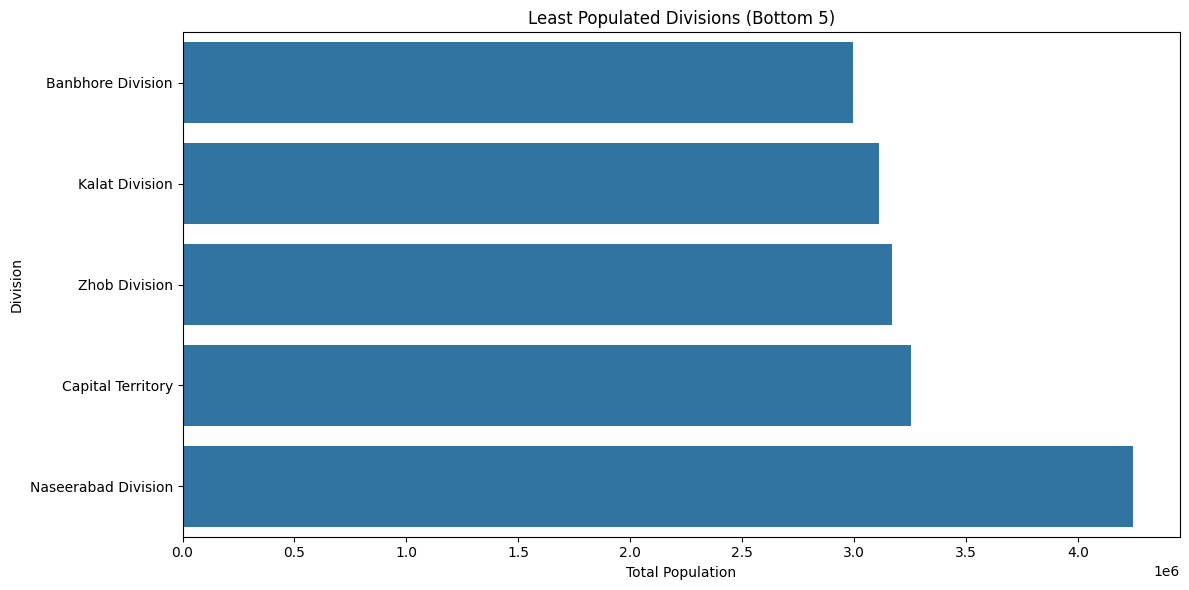

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x='Total', y='Division', data=population_division_min)
plt.title('Least Populated Divisions (Bottom 5)')
plt.xlabel('Total Population')
plt.ylabel('Division')
plt.tight_layout()

In [46]:
literacy_rate_district = literacy_rate_data.groupby(['District'])['Total'].mean().reset_index().sort_values(by='Total', ascending=False).head(10)

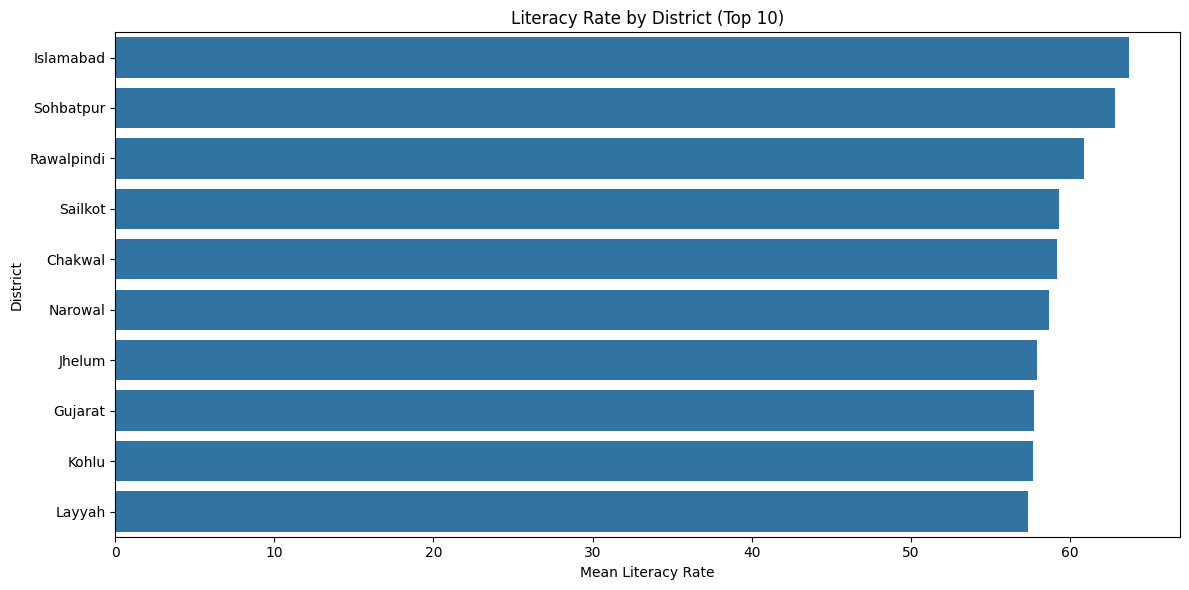

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='Total', y='District', data=literacy_rate_district)
plt.title('Literacy Rate by District (Top 10)')
plt.xlabel('Mean Literacy Rate')
plt.ylabel('District')
plt.tight_layout()